In [12]:
import pandas as pd
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Correlation

In [14]:
data.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Ekata\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

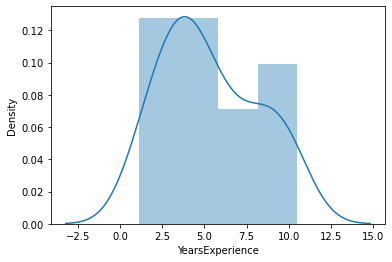

In [19]:
import seaborn as sns
sns.distplot(data['YearsExperience'])


C:\Users\Ekata\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

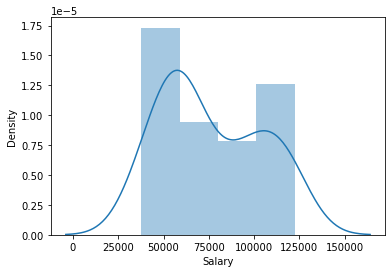

In [20]:
sns.distplot(data['Salary'])

In [21]:
from scipy.stats import skew
data.skew(axis=0, skipna=True)

YearsExperience    0.37956
Salary             0.35412
dtype: float64

# Fitting a Linear Regression Model

In [22]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=data).fit()

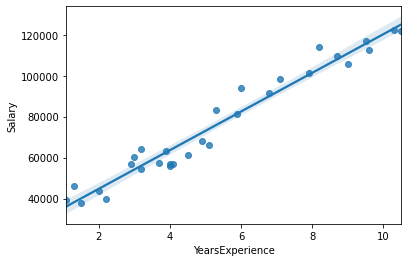

In [23]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [24]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [25]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 


Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [26]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Predict for new data point

In [28]:
#Predict for 5 and 9 years of experiences
newdata=pd.Series([5,9])
newdata

0    5
1    9
dtype: int64

In [32]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,9


In [33]:
model.predict(data_pred)

0     73042.011806
1    110841.861092
dtype: float64

In [36]:
5*(model.params[1])+(model.params[0])    # y=mx+c  m=B0    c=B1

73042.01180594407